In [2]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
cols = np.loadtxt('./data2.txt', delimiter=',', unpack=True)

X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

# Plot the data to see what it looks like

# plt.figure(figsize=(10,6))
# plt.plot(X[:,1],y[:,0],'rx',markersize=10)
# plt.grid(True) #Always plot.grid true!
# plt.ylabel('Profit in 10^9 vnd')
# plt.xlabel('Population in 10^6')

plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col 0 (column of 1)')
dummy = plt.hist(X[:,1],label = 'col 1')
dummy = plt.hist(X[:,2],label = 'col 2')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()


Automatically created module for IPython interactive environment


range(0, 3)
0
1
2
[1.0, 2000.6808510638298, 3.1702127659574466]
[0.0, 786.2026187430467, 0.7528428090618781]


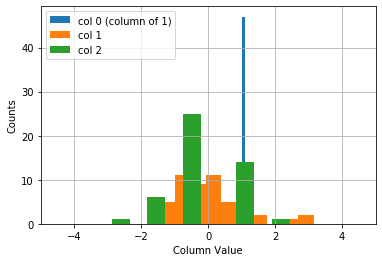

In [3]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
print(range(Xnorm.shape[1]))
for icol in range(Xnorm.shape[1]):
    print(icol)
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]
print(stored_feature_means)
print(stored_feature_stds)
    
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col 0 (column of 1)')
dummy = plt.hist(Xnorm[:,1],label = 'col 1')
dummy = plt.hist(Xnorm[:,2],label = 'col 2')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [4]:
X_backup = X
X = Xnorm

def computeCost(theta, X, y, my_lambda = 0.0):
    m = y.size
    h = X.dot(theta) # (m x 2) * (2 x 1)
    reg_term = my_lambda * np.sum(np.square(theta))
    return (1/(2*m)) * (np.sum(np.square(h - y)) + reg_term)

initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
# initial_theta = np.array([[1.],[1.],[1.]])
print(initial_theta)
print(computeCost(initial_theta, X, y, 0.5))

[[0.]
 [0.]
 [0.]]
65591548106.45744


In [5]:
def gradientDescent(theta, X, y, alpha, num_ite, my_lambda = 0.0):
    m = y.size
    j_history = np.zeros(num_ite)
    theta_history = []
    for i in range(num_ite):
        theta_history.append(list(theta[:,0]))
        theta = theta - (alpha/m) * (X.T.dot(X.dot(theta) - y) + my_lambda * theta)
        j_history[i] = computeCost(theta, X, y)
    return theta, j_history, theta_history

In [6]:
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'b.')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")

In [ ]:
init_theta = np.zeros((X.shape[1], 1))
theta, j_history, theta_history = gradientDescent(init_theta, X, y, 0.01, 400, 0.5)
print('Theta: ', theta)

new_sample = np.array([1650.0, 3.0])
for idx in range(len(new_sample)):
    new_sample[idx] = (new_sample[idx] - stored_feature_means[idx+1])/stored_feature_stds[idx+1]
new_sample = np.insert(new_sample, 0, 1, axis=0)
print('Price of house with 1650 square feet and 3 bedrooms: ', new_sample.dot(theta))
plotConvergence(j_history)


In [ ]:
# Visualizing J for univariate linear regression
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for xi in xvals:
    for yi in yvals:
        myxs.append(xi)
        myys.append(yi)
        myzs.append(computeCost(np.array([[xi], [yi]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('Reds'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in theta_history],[x[1] for x in theta_history],j_history,'bo-')
plt.show()